In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#그래프 한글폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False



In [2]:
#결합확률질량함수
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 7, 4, 1, 0],
                [0, 1, 4, 5, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.14,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.1 ,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

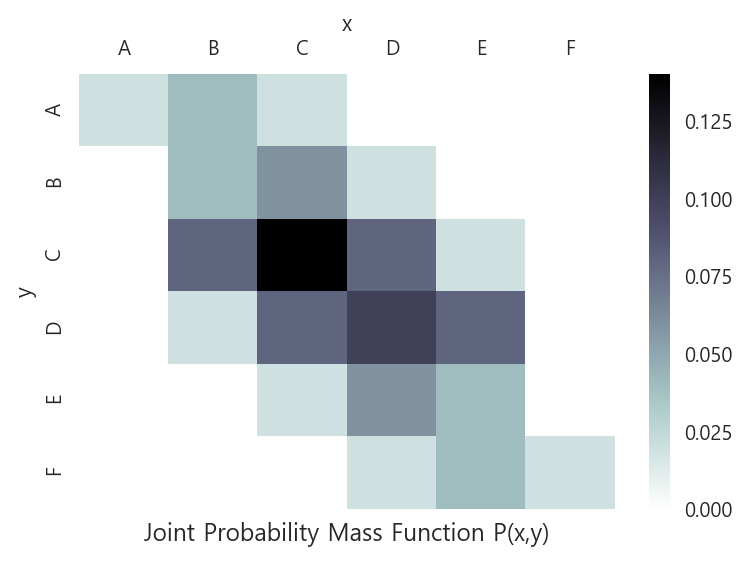

In [3]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r, 
                 xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
                 yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

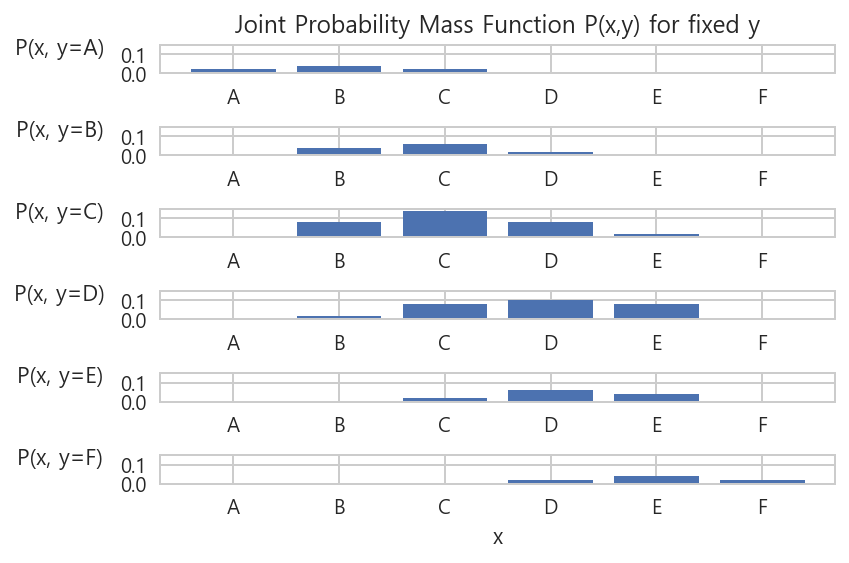

In [4]:
x = np.arange(6)
plt.subplot(611); plt.bar(x, pmf[0, :]); plt.ylabel("P(x, y=A)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability Mass Function P(x,y) for fixed y")
plt.subplot(612); plt.bar(x, pmf[1, :]); plt.ylabel("P(x, y=B)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(613); plt.bar(x, pmf[2, :]); plt.ylabel("P(x, y=C)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(614); plt.bar(x, pmf[3, :]); plt.ylabel("P(x, y=D)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(615); plt.bar(x, pmf[4, :]); plt.ylabel("P(x, y=E)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(616); plt.bar(x, pmf[5, :]); plt.ylabel("P(x, y=F)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.xlabel("x")
plt.tight_layout()
plt.show()

In [5]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([ 0.02,  0.18,  0.32,  0.28,  0.18,  0.02])

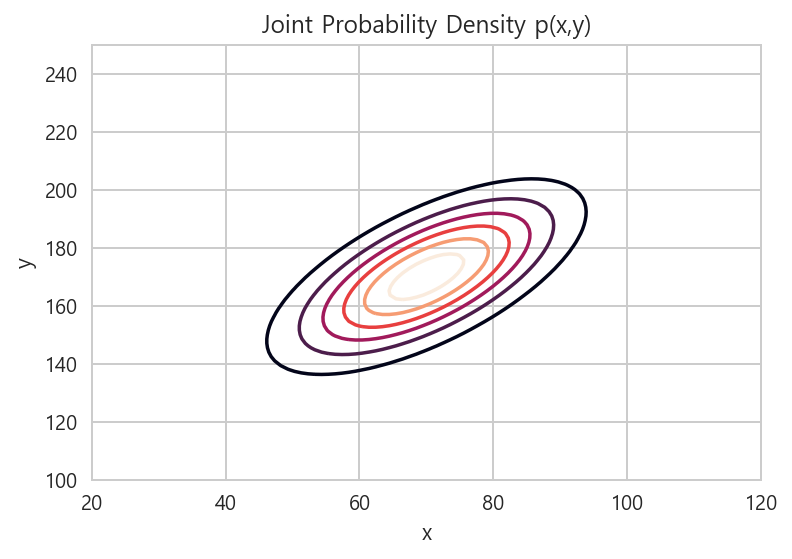

In [6]:
# 결합확률밀도
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density p(x,y)")
plt.show()

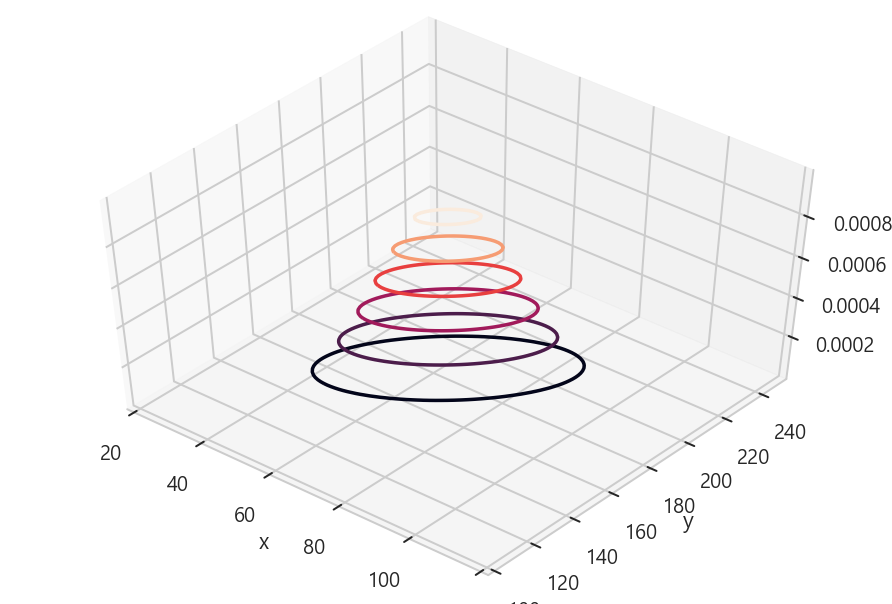

In [7]:
#3차원으로 그릴때

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.view_init(50, -50)
plt.show()

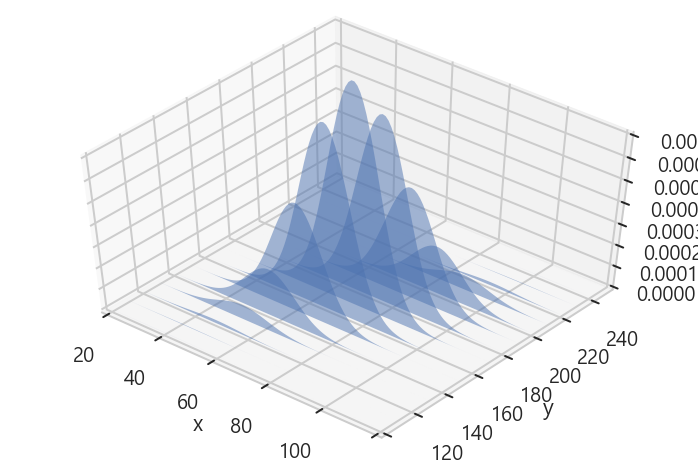

In [8]:
#함수단면을 그릴때

from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()


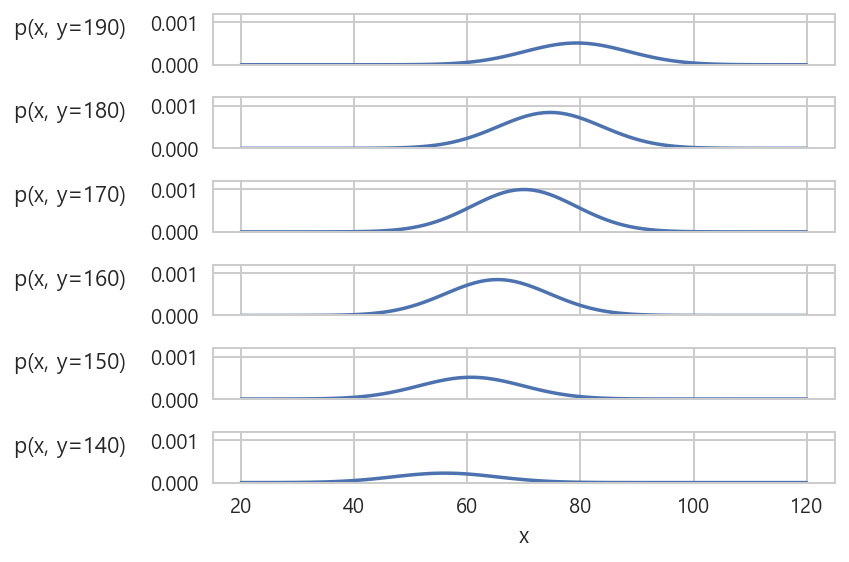

In [9]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

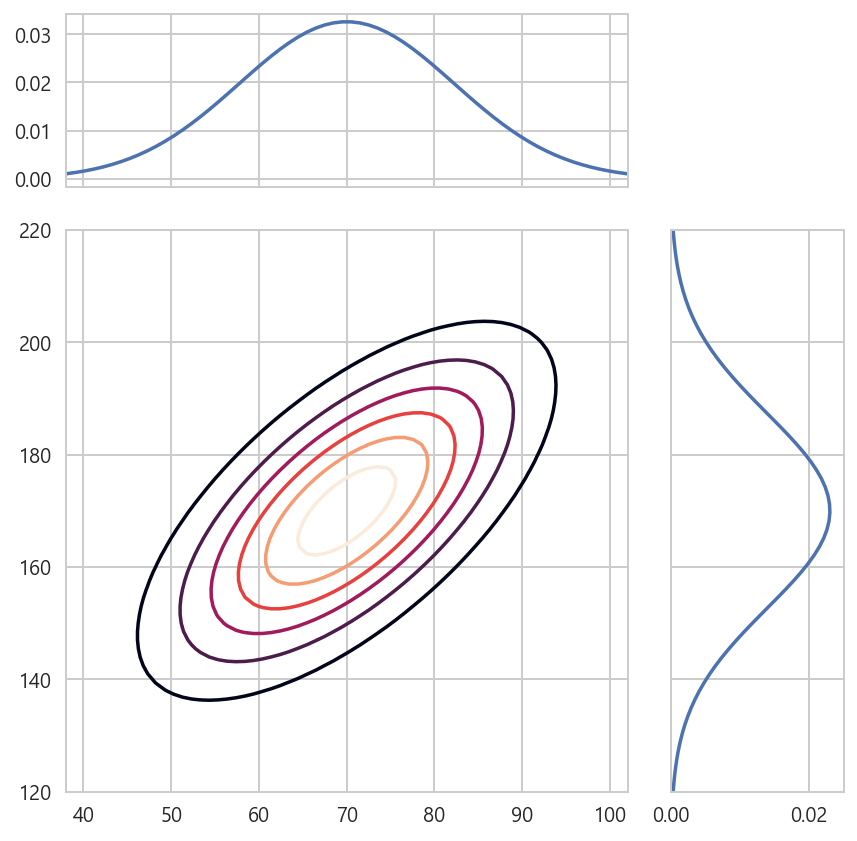

In [10]:
#주변확률밀도합수

from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)
plt.show()

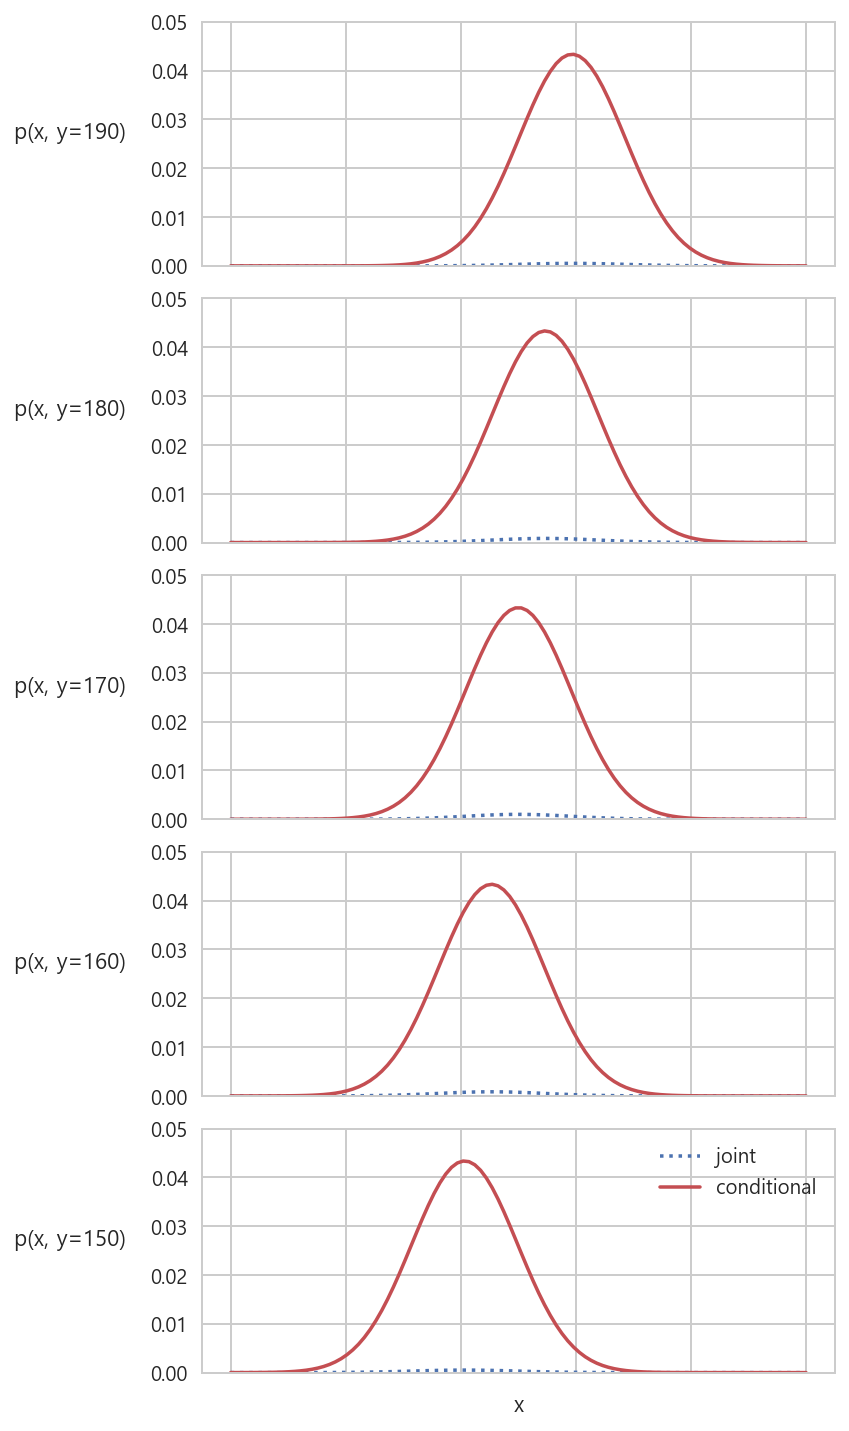

In [11]:
#조건부 확률밀도함수
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,10))

for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()

In [12]:
np.set_printoptions(precision=4)
pmf1 = np.array([[1, 2, 3, 2, 1],
                 [2, 4, 6, 4, 2],
                 [4, 8,12, 8, 4],
                 [2, 4, 6, 4, 2],
                 [1, 2, 3, 2, 1]])
pmf1 = pmf1/pmf1.sum()
pmf1

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

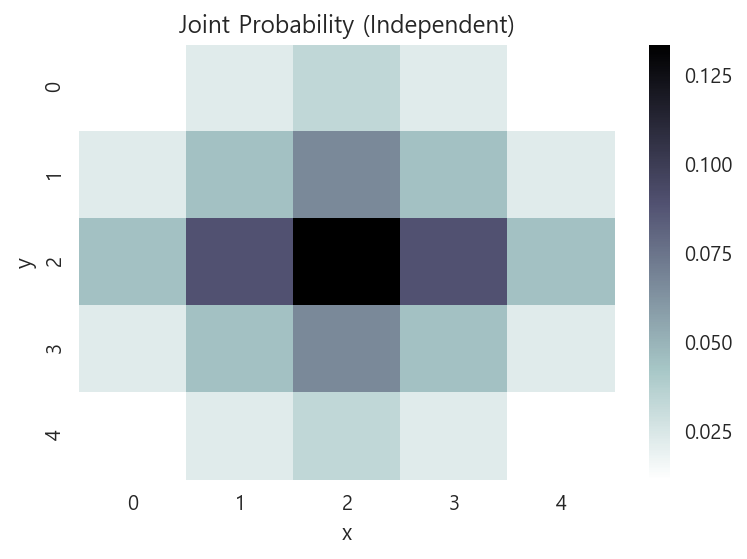

In [13]:
#독립인경우-----------------------------------
sns.heatmap(pmf1, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Independent)")
plt.show()


In [14]:
pmf1_marginal_x = pmf1.sum(axis=0)
pmf1_marginal_y = pmf1.sum(axis=1)
pmf = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
pmf/pmf.sum()

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

In [15]:
pmf2 = np.array([[0, 0, 0, 1, 1],
                 [0, 0, 2, 3, 1],
                 [0, 2, 5, 2, 0],
                 [1, 3, 2, 0, 0],
                 [1, 1, 0, 0, 0]])
pmf2 = pmf2/pmf2.sum()
pmf2

array([[ 0.  ,  0.  ,  0.  ,  0.04,  0.04],
       [ 0.  ,  0.  ,  0.08,  0.12,  0.04],
       [ 0.  ,  0.08,  0.2 ,  0.08,  0.  ],
       [ 0.04,  0.12,  0.08,  0.  ,  0.  ],
       [ 0.04,  0.04,  0.  ,  0.  ,  0.  ]])

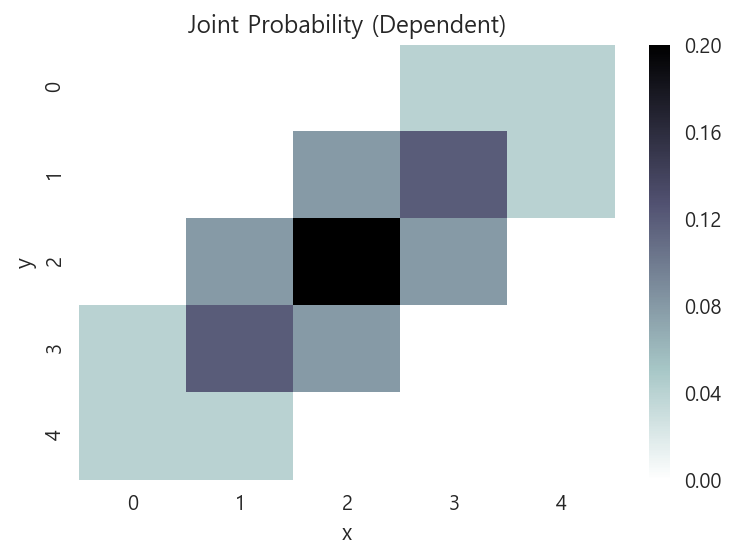

In [16]:
#독립이 아닌경우------------------------------
sns.heatmap(pmf2, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Dependent)")
plt.show()

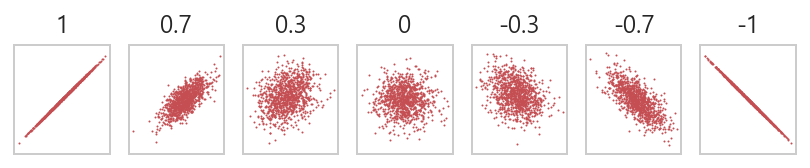

In [17]:
#확률변수의 공분산과 상관계수

np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 1))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r)
plt.show()

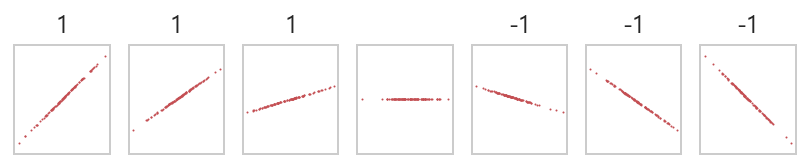

In [20]:
# 기울기와는 상관이 없다(선형을 이루는 정도가 곧 상관계수의 크기가 된다)
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 1))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(1)
    if s < 0:
        plt.title(-1)
plt.show()


In [21]:
# 로가 0이어도 항상 독립이 아닌경우가 있다.
data = sm.datasets.get_rdataset("anscombe")
df = data.data
df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


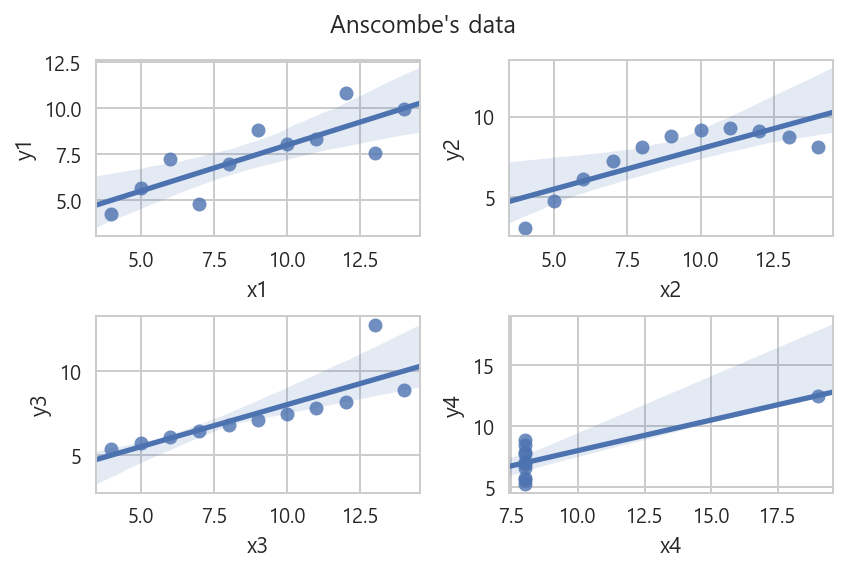

In [22]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's data")
plt.show()

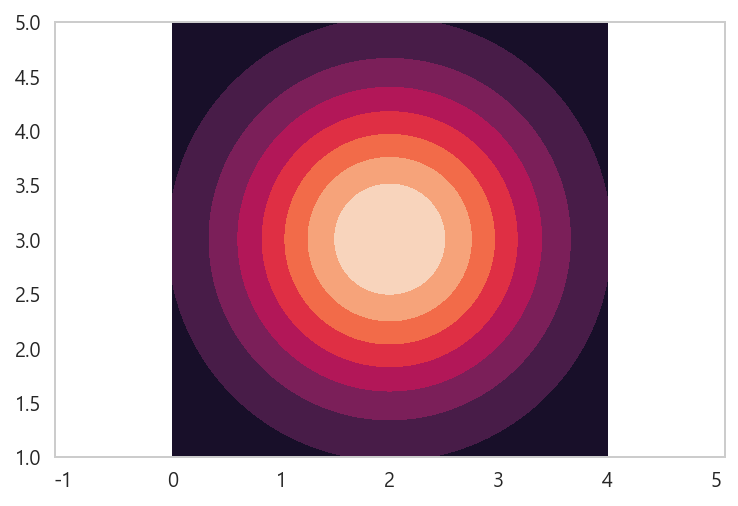

In [23]:
# 다변수 정규분포의 예

mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

#이렇게 나오면 독립이다

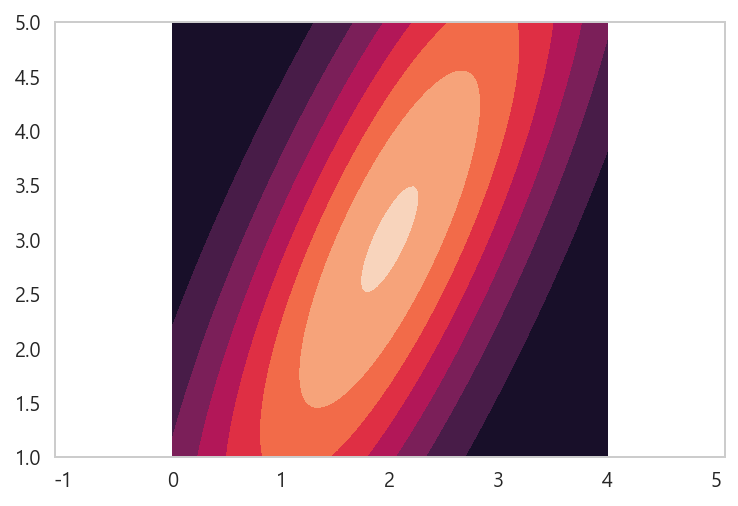

In [25]:
mu = [2, 3]
cov = [[2, 3],[3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

#이건 상관관계이다.